# Задание 1

## Для выполнения задания №1 используйте датасеты для задачи классификации и регрессии.

In [1]:
import pandas as pd

In [2]:
df_class = pd.read_csv('..\data\weatherAUS_redux.csv')

In [3]:
df_reg = pd.read_csv('..\data\diamonds_redux.csv')

In [8]:
y_reg = df_reg["price"]
X_reg = df_reg.drop(["price"], axis=1)

In [10]:
y_class = df_class["rain_tomorrow"]
X_class = df_class.drop(["rain_tomorrow"], axis=1)

## С помощью классов библиотеки sklearn выполните понижение размерности (размерность выберите сами, можно разные) с использованием всех описанных методов (VarianceThreshold, SelectKBest, RFE, PCA, tSNE, Isomap).

- VarianceThreshold:
Метод VarianceThreshold позволяет отбрасывать признаки с низкой дисперсией, то есть те признаки, которые содержат мало или никакой информации. Он использует пороговое значение, при котором признаки с дисперсией ниже этого значения считаются несущественными и удаляются.

In [31]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, RFE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [14]:
vt = VarianceThreshold(2)
X_vt_reg = vt.fit_transform(X_reg)
X_vt_reg.shape

(53794, 5)

In [16]:
vt = VarianceThreshold(1)
X_vt_class = vt.fit_transform(X_class)
X_vt_class.shape

(63748, 12)

In [26]:
X_vt_reg_train, X_vt_reg_test, y_train_reg, y_test_reg = train_test_split(X_vt_reg, y_reg, test_size=0.2)

In [27]:
mlrm = LinearRegression().fit(X_vt_reg_train, y_train_reg)

In [29]:
print(f'R^2: {mlrm.score(X_vt_reg_test, y_test_reg)}')

R^2: 0.1240638953733254


In [30]:
X_vt_class_train, X_vt_class_test, y_train_class, y_test_class = train_test_split(X_vt_class, y_class, test_size=0.2)

In [32]:
gnb = GaussianNB()
gnb.fit(X_vt_class_train, y_train_class)
y_pred = gnb.predict(X_vt_class_test)
accuracy_score(y_test_class, y_pred)

0.9483137254901961

- SelectKBest:
Метод SelectKBest основан на статистическом тестировании и выбирает k лучших признаков в соответствии с заданной метрикой. Он оценивает взаимосвязь каждого признака с целевой переменной и оставляет только наиболее значимые признаки.

In [18]:
skb = SelectKBest(k=3)
X_skb_reg = skb.fit_transform(X_reg, y_reg)
X_skb_reg.shape

(53794, 3)

In [19]:
skb = SelectKBest(k=9)
X_skb_class = skb.fit_transform(X_class, y_class)
X_skb_class.shape

(63748, 9)

In [33]:
X_skb_reg_train, X_skb_reg_test, y_train_reg, y_test_reg = train_test_split(X_skb_reg, y_reg, test_size=0.2)
mlrm = LinearRegression().fit(X_skb_reg_train, y_train_reg)
print(f'R^2: {mlrm.score(X_skb_reg_test, y_test_reg)}')

R^2: 0.8508261520382686


In [34]:
X_skb_class_train, X_skb_class_test, y_train_class, y_test_class = train_test_split(X_skb_class, y_class, test_size=0.2)
gnb = GaussianNB()
gnb.fit(X_skb_class_train, y_train_class)
y_pred = gnb.predict(X_skb_class_test)
accuracy_score(y_test_class, y_pred)

0.9653333333333334

- RFE (Recursive Feature Elimination):
Метод RFE использует итеративный подход для выбора наиболее значимых признаков. Он основывается на ранжировании признаков с помощью оценивателя и последующем исключении наименее значимых признаков. Процесс повторяется до тех пор, пока не будет достигнуто желаемое количество выбранных признаков.

In [36]:
mlrm = LinearRegression().fit(X_reg, y_reg)
rfe = RFE(estimator = mlrm, n_features_to_select=4).fit(X_reg, y_reg)
X_rfe_reg = pd.DataFrame(rfe.transform(X_reg), columns=rfe.get_feature_names_out())
X_rfe_reg_train, X_rfe_reg_test, y_train_reg, y_test_reg = train_test_split(X_rfe_reg, y_reg, test_size=0.2)
mlrm = LinearRegression().fit(X_rfe_reg_train, y_train_reg)
print(f'R^2: {mlrm.score(X_rfe_reg_test, y_test_reg)}')

R^2: 0.9064513720875493


In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
lr = LogisticRegression().fit(X_class, y_class)
rfe = RFE(estimator = lr, n_features_to_select=7).fit(X_class, y_class)
X_rfe_class = pd.DataFrame(rfe.transform(X_class), columns=rfe.get_feature_names_out())
X_rfe_class_train, X_rfe_class_test, y_train_class, y_test_class = train_test_split(X_rfe_class, y_class, test_size=0.2)
gnb.fit(X_rfe_class_train, y_train_class)
y_pred = gnb.predict(X_rfe_class_test)
accuracy_score(y_test_class, y_pred)

0.9657254901960785

- PCA (Principal Component Analysis):
Метод PCA выполняет линейное преобразование данных и создает новые наборы признаков, называемые главными компонентами. Главные компоненты образуют ортогональное базисное пространство, в котором сохраняется наибольшая возможная дисперсия данных. Он может использоваться для снижения размерности данных и улучшения интерпретируемости модели.

In [49]:
import matplotlib.pyplot as plt

In [44]:
pca = PCA(n_components=2)
X_pca_reg = pca.fit_transform(X_reg)

In [45]:
pca = PCA(n_components=5)
X_pca_class = pca.fit_transform(X_class)

In [47]:
X_pca_reg_train, X_pca_reg_test, y_train_reg, y_test_reg = train_test_split(X_pca_reg, y_reg, test_size=0.2)
mlrm = LinearRegression().fit(X_pca_reg_train, y_train_reg)
print(f'R^2: {mlrm.score(X_pca_reg_test, y_test_reg)}')

R^2: 0.15621897796516304


In [48]:
X_pca_class_train, X_pca_class_test, y_train_class, y_test_class = train_test_split(X_pca_class, y_class, test_size=0.2)
gnb = GaussianNB()
gnb.fit(X_pca_class_train, y_train_class)
y_pred = gnb.predict(X_pca_class_test)
accuracy_score(y_test_class, y_pred)

0.988313725490196

- t-SNE (t-Distributed Stochastic Neighbor Embedding):
Метод t-SNE представляет данные в низкоразмерном пространстве с помощью учета сходства между точками. Он стремится сохранить близость объектов в высокоразмерном пространстве и отображает их в низкоразмерном пространстве таким образом, чтобы близкие объекты оставались близкими, а далекие объекты - далекими.

In [52]:
tsne = TSNE(n_components=2)
X_tsne_reg = tsne.fit_transform(X_reg)

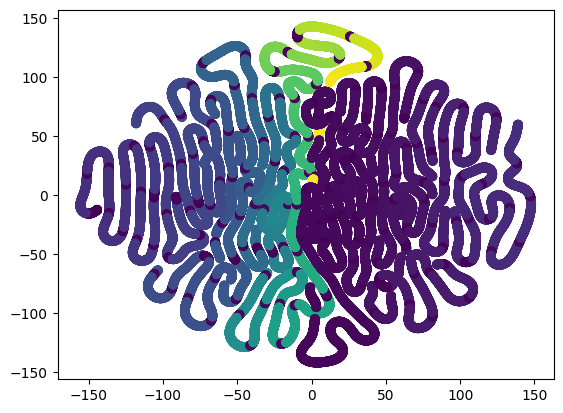

In [53]:
plt.scatter(X_tsne_reg[:,0], X_tsne_reg[:,1], c=y_reg);

In [54]:
tsne = TSNE(n_components=3)
X_tsne_class = tsne.fit_transform(X_class)

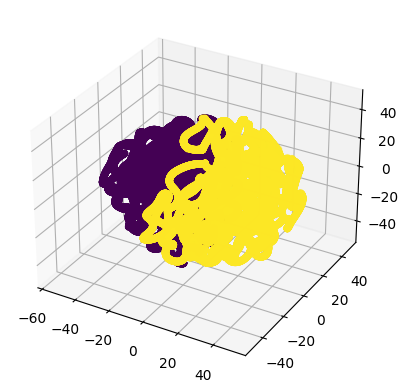

In [56]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_tsne_class[:,0], X_tsne_class[:,1], X_tsne_class[:,2], c=y_class);

In [57]:
X_tsne_reg_train, X_tsne_reg_test, y_train_reg, y_test_reg = train_test_split(X_tsne_reg, y_reg, test_size=0.2)
mlrm = LinearRegression().fit(X_tsne_reg_train, y_train_reg)
print(f'R^2: {mlrm.score(X_tsne_reg_test, y_test_reg)}')

R^2: 0.09300950738217473


In [58]:
X_tsne_class_train, X_tsne_class_test, y_train_class, y_test_class = train_test_split(X_tsne_class, y_class, test_size=0.2)
gnb = GaussianNB()
gnb.fit(X_tsne_class_train, y_train_class)
y_pred = gnb.predict(X_tsne_class_test)
accuracy_score(y_test_class, y_pred)

0.9483921568627451

- Isomap:
Метод Isomap также выполняет понижение размерности данных, сохраняя их геометрическую структуру, основанную на метрической информации о расстояниях между точками. Он строит граф, где вершины представляют объекты, а ребра - их соседство на основе метрики расстояния. Затем используется алгоритм многомерного шкалирования (MDS) для нахождения новых координат в низкоразмерном пространстве, которые сохраняют геометрию данных.

In [61]:
import random

In [64]:
sample_size = min(1000, X_reg.shape[0])
random_indices = random.sample(range(X_reg.shape[0]), sample_size)
X_subset_reg = X_reg.iloc[random_indices]
y_subset_reg = y_reg.iloc[random_indices]

sample_size = min(1000, X_class.shape[0])
random_indices = random.sample(range(X_class.shape[0]), sample_size)
X_subset_class = X_class.iloc[random_indices]
y_subset_class = y_class.iloc[random_indices]

In [65]:
isomap = Isomap(n_components=2)
X_isomap_reg = isomap.fit_transform(X_subset_reg)

C:\Users\Sovano\Desktop\ML\venv\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 5 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\Sovano\Desktop\ML\venv\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Sovano\Desktop\ML\venv\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Sovano\Desktop\ML\venv\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])

In [66]:
isomap = Isomap(n_components=2)
X_isomap_class = isomap.fit_transform(X_subset_class)

C:\Users\Sovano\Desktop\ML\venv\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 8 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\Sovano\Desktop\ML\venv\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Sovano\Desktop\ML\venv\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Sovano\Desktop\ML\venv\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])

In [67]:
X_isomap_reg_train, X_isomap_reg_test, y_train_reg, y_test_reg = train_test_split(X_isomap_reg, y_subset_reg, test_size=0.2)
mlrm = LinearRegression().fit(X_isomap_reg_train, y_train_reg)
print(f'R^2: {mlrm.score(X_isomap_reg_test, y_test_reg)}')

R^2: 0.36674145906587363


In [68]:
X_isomap_class_train, X_isomap_class_test, y_train_class, y_test_class = train_test_split(X_isomap_class, y_subset_class, test_size=0.2)
gnb = GaussianNB()
gnb.fit(X_isomap_class_train, y_train_class)
y_pred = gnb.predict(X_isomap_class_test)
accuracy_score(y_test_class, y_pred)

0.955

# Задание 2*

## Самостоятельно реализуйте алгоритм PCA. На основе датасета для задачи классификации выполните понижение размерности до 2 (преобразуйте данные в двумерное пространство). Выполните визуализацию данных (точки на плоскости).

In [69]:
import numpy as np

In [1]:
def my_pca(X, n_components=2):
    # Центрирование данных
    mean = np.mean(X, axis=0)
    X_centered = X - mean
    # Вычисление ковариационной матрицы
    cov_matrix = np.cov(X_centered.T)
    # Вычисление собственных значений и собственных векторов
    values, vectors = np.linalg.eig(cov_matrix)
    # Сортировка собственных значений и собственных векторов по убыванию
    sorted_indices = np.argsort(values)[::-1]
    sorted_values = values[sorted_indices]
    sorted_vectors = vectors[:, sorted_indices]
    # Выбор заданного количества компонент
    selected_vectors = sorted_vectors[:, :n_components]
    # Проекция данных на пространство главных компонент
    X_projected = X_centered.dot(selected_vectors)
    return X_projected

In [82]:
X_pca = my_pca(np.array(X_class), n_components=2)

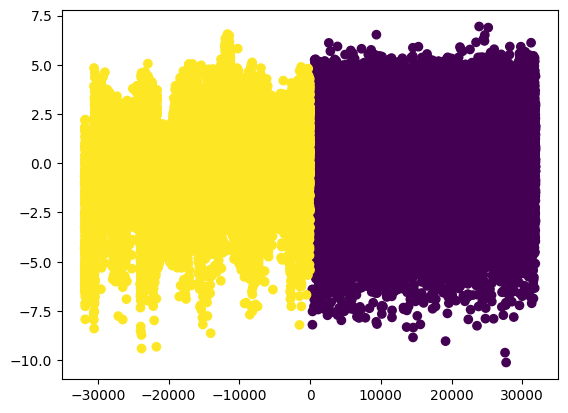

In [83]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=np.array(y_class))

In [85]:
class Kmeans:
    def __init__(self, n_clusters, max_iters=100):
        self.n_clusters = n_clusters
        self.max_iters = max_iters

    def initialize_centroids(self, X):
        centroids_idx = np.random.choice(range(X.shape[0]), size=self.n_clusters, replace=False)
        centroids = X[centroids_idx]
        return centroids

    def assign_clusters(self, X, centroids):
        distance_matrix = np.zeros((X.shape[0], self.n_clusters))
        for i, centroid in enumerate(centroids):
            distance_matrix[:, i] = np.linalg.norm(X - centroid, axis=1)
        cluster_labels = np.argmin(distance_matrix, axis=1)
        return cluster_labels

    def update_centroids(self, X, cluster_labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            centroids[i] = np.mean(X[cluster_labels == i], axis=0)
        return centroids

    def fit(self, X):
        centroids = self.initialize_centroids(X)
        for _ in range(self.max_iters):
            cluster_labels = self.assign_clusters(X, centroids)
            new_centroids = self.update_centroids(X, cluster_labels)
            if np.allclose(new_centroids, centroids):
                break
            centroids = new_centroids
        return centroids, cluster_labels

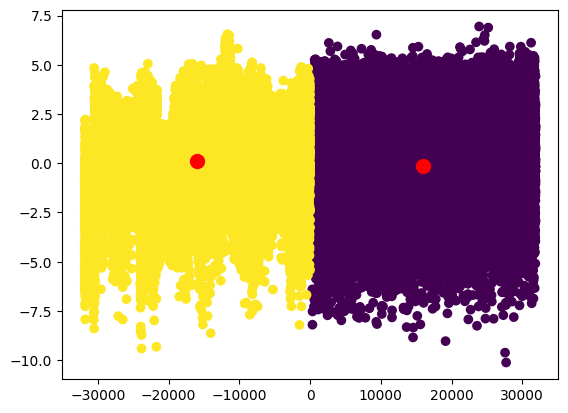

In [87]:
# Создание экземпляра KMeans и обучение на данных X
kmeans = Kmeans(n_clusters=2)
centroids, cluster_labels = kmeans.fit(X_pca)

plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_labels)
plt.scatter(centroids[:,0], centroids[:,1], s=100, c='red')

In [88]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, rand_score, fowlkes_mallows_score

In [89]:
# Внутренние метрики
print(silhouette_score(X_pca, cluster_labels))
print(calinski_harabasz_score(X_pca, cluster_labels))

# Внешние метрики
print(rand_score(cluster_labels, y_class))
print(fowlkes_mallows_score(cluster_labels, y_class))

0.6267228527551927
191237.99069715836
1.0
1.0
